In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import pathlib
from matplotlib import pyplot as plt
import seaborn as sb
import warnings
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
from scipy.stats import ks_2samp
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from matplotlib import rcParams
import yaml
import matplotlib
warnings.filterwarnings('ignore')
import final_processing.figure_formatting as ff
import final_processing.loading_functions as lf
import final_processing.MAPseq_data_processing as mdp
import statsmodels.formula.api as smf
import final_processing.fig2_plotting as pltt
import final_processing.helper_functions as hf
%matplotlib inline

In [2]:
gen_parameters = lf.load_gen_params()
mice = gen_parameters['MICE']
saving_path = gen_parameters['fig_saving_path']
proj_path = gen_parameters['proj_path']
ff.set_font_params(gen_parameters)

Extended Data Fig. 4a

p value for VISam is 3.6
p value for VISrl is 3.5
p value for VISpor is 2.6e-24
p value for VISpl is 7.5e-08


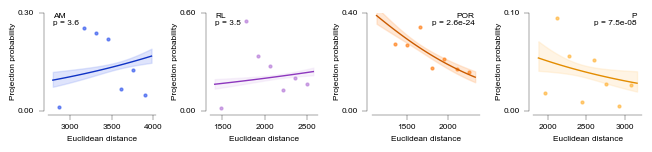

In [14]:
combined_dict = mdp.samples_to_areas(mice = mice, proj_path=proj_path)
all_mice_combined = pd.concat([
    combined_dict[k]['homogenous_across_cubelet'][mdp.get_common_columns(mice=mice, combined_dict=combined_dict, cortex=True)]
    for k in mice
])
AP_position_dict_list_combined, AP_soma_VC_sample = mdp.compute_mean_soma_AP_positions(gen_parameters=gen_parameters)
areas_to_plot = ['VISam', 'VISrl', 'VISpor', 'VISpl']
fig, axes = plt.subplots(
    nrows=1,          
    ncols=4,        
    figsize=(6.5, 1.5),     
)
pltt.plot_area_projection_probs(areas_to_plot=areas_to_plot, gen_parameters=gen_parameters, combined_dict=combined_dict, AP_position_dict_list_combined=AP_position_dict_list_combined, fig=fig, axes=axes, only_plot_distance=True, include_pval=True)
fig.savefig(f"{saving_path}/supplementary/s4a_dist_ap.pdf", format="pdf")
fig.savefig(f"{saving_path}/supplementary/s4a_dist_ap.svg", format="svg")

Extended data fig. 4b

p value for VISam is 0.0022
p value for VISrl is 5.1e-28
p value for VISpor is 3.5e-09
p value for VISpl is 0.023


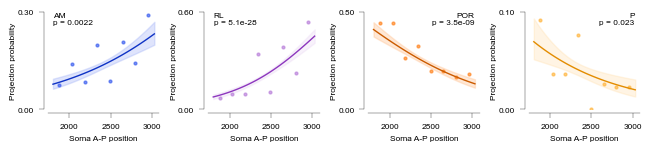

In [15]:
fig, axes = plt.subplots(
    nrows=1,          
    ncols=4,        
    figsize=(6.5, 1.5),     
)
pltt.plot_area_projection_probs(areas_to_plot=areas_to_plot, gen_parameters=gen_parameters, combined_dict=combined_dict, AP_position_dict_list_combined=AP_position_dict_list_combined, fig=fig, axes=axes, include_dist_as_covariate=True, include_pval=True)
fig.savefig(f"{saving_path}/supplementary/s4b_dist_covar_ap.pdf", format="pdf")
fig.savefig(f"{saving_path}/supplementary/s4b_dist_covar_ap.svg", format="svg")